### Integrantes

Rafael Augusto Monteiro - 9293095  
William Quelho Ferreira - 9293421

# Exploração dos dados - Parte VI

Datasets selecionado:
* Titanic

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('dark_background')
plt.style.use('default')

In [4]:
path = "train.csv"

df = pd.read_csv(path)
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
#Definição da função classificacao
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import Perceptron

from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from numpy import mean, std

from sklearn.metrics import accuracy_score

# import warnings
# warnings.filterwarnings('ignore')

def classificacao(data, columns, target, score=accuracy_score, score_name='acurácia', 
                  folds=5, plot=True):
    """
    Executa classificação do conjunto de dados passado
    ---------------------------------------------------------------
    data:       DataFrame. Conjunto de dados
    columns:    Lista de inteiros. Índice das colunas utilizadas no treinamento e teste
    target:     Inteiro. Índice da coluna alvo
    score:      Função. A função que calcula a medida de desempenho desejada. Deve ser uma 
                função que compara dois vetores, o primeiro vetor são os valores preditos
                pelo classificador, o segundo os rótulos reais
                Vide exemplo das funções em 
                http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics
                como por exemplo, sklearn.metrics.accuracy_score
                http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
    score_name: String. Uma string com o nome da medida de desempenho
    folds:      Inteiro. Número de folds na validação cruzada
    plot:       Booleano. True para plotar os gráficos False para não plotar
    ---------------------------------------------------------------
    Realiza a classificação em 6 modelos (perceptron, 
    SVM com kernel polinomial de grau 3, Árvore de decisão, 3NN, 5NN, e 7NN)
    Plot o gráfico de desempenho para cada classificador.
    Retorna um dicionário com os classificadores treinados e as medidas de desempenho
    """
    import numpy as np
    # inicializa os modelos com os parâmetros solicitados
    prcp = Perceptron()
    svm_n = SVC(C=10*len(data), kernel='poly', degree=3, gamma=1, coef0=1, cache_size=500, max_iter=1e6)
    dt = DecisionTreeClassifier(criterion='gini', splitter='best', min_samples_split=int(len(data)*0.1))
    _3nn = KNeighborsClassifier(n_neighbors=3, weights='uniform', algorithm='auto')
    _5nn = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto')
    _7nn = KNeighborsClassifier(n_neighbors=7, weights='uniform', algorithm='auto')
    
    clfs = [prcp, svm_n, dt, _3nn, _5nn, _7nn]
    clfs_names = ['perceptron', 'svm_poly', 'dt', '3nn', '5nn', '7nn']
    
    # prepara validação cruzada
    # faz divisão do dataset em 5 partes
    cv = KFold(n_splits=folds, shuffle=True)
    
    # itera para cada classificador fazendo treino e teste
    results = {'perceptron':[], 'svm_poly':[], 'dt':[], '3nn':[], '5nn':[], '7nn':[]}
    for c, c_name in zip(clfs, clfs_names):
        for train_index, test_index in cv.split(data):
            
            # separa conjunto de treino e de teste
            x_train, y_train = data.iloc[train_index, columns], data.iloc[train_index, target]
            x_test, y_test = data.iloc[test_index, columns], data.iloc[test_index, target]
            
            # faz o treino do modelo
            clf = c.fit(X=x_train, y=y_train)
            
            # valores predito pelo classificador
            y_pred = clf.predict(x_test)
            # rótulos verdadeiros convertidos para array
            y_test = np.array(y_test)
            
            # realiza predição no conjunto de teste e salva o resultado
            results[c_name].append( score(y_test, y_pred) )
    
    if not plot:
        return {'results': results, 'clfs':clfs}
    # faz o plot de desempenho dos classificadores
    plt.figure(figsize=(8,8))
    plt.bar(range(1, len(clfs)+1), [mean(results[name]) for name in clfs_names], 
                                yerr=[std(results[name]) for name in clfs_names])
    plt.xticks(range(1, len(clfs)+1), clfs_names, rotation=45)
    title = 'Desempenho dos classificadores - %s'%(score_name)
    plt.title(title)
    plt.show()
    
    return {'results': results, 'clfs':clfs}



### Perguntas

1. Defina quais os atributos você utilizará, e a medida de avaliação você acha adequada e explique o porquê dessas escolhas.
2. Execute a função classificacao definida no notebook com a medida de desempenho que você definiu (caso necessário implemente ela, tem um exmeplo no código de como fazer isso). Diga qual o modelo tem o melhor desempenho e explique porque você acha isso.
3. Implementar os procedimentos de amostragem para estimação do desempenho:
  * 10-fold Cross Validation;
  * Leave-one-out;
  * Boostrap (1000 amostras de boostrap). 
4. Escolher um dos procedimentos da questão anterior (10-fold cross validation, leave-one-out ou bootstrap) e calcular as medidas de avaliação baseadas na matriz de confusão (TFP, TFN, TVN, TVP). Como em meio a tantas medidas de avaliação, comparar os classificadores? Como escolher o melhor?

### Respostas

### 1.

Para essa prática, serão utilizados os atributos Pclass, Age, Sibsp e Parch para predizer a classe Survived (se o passageiro sobreviveu ou não). Como medida de avaliação, queremos minimizar a taxa de falsos positivos (neste caso, seriam passageiros que NÃO sobreviveriam sendo classificados como passageiros que sobreviveriam).

### 2.

In [6]:
from sklearn.metrics import confusion_matrix

def false_positive_rate(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return fp / (fp + tn)

c:\program files\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\program files\python37\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
c:\program files\python37\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=1000000).  Consider pre-processing your

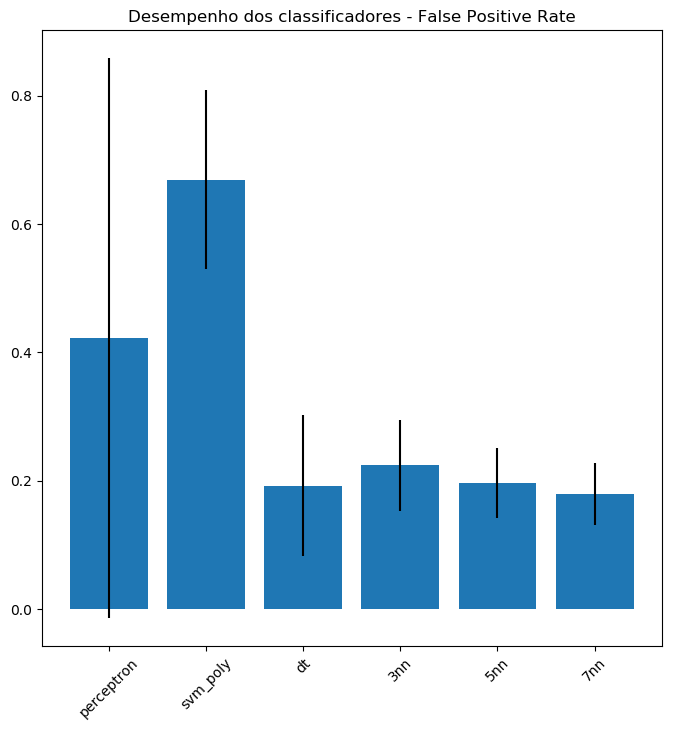

In [20]:
# Separando atributos relevantes
selected = df.iloc[:,[1,2,5,6,7]]
selected.dropna(inplace=True)
res = classificacao(selected, range(1,len(selected.columns)), 0, score=false_positive_rate, score_name='False Positive Rate',folds=10)

O melhor modelo encontrado foi dado pelo algoritmo 7nn, que é relativamente simples, apresentou baixa taxa de falsos positivos e variância pequena.

### 3.


In [73]:
import random
from itertools import chain

def kfold_split(data, n_folds):
    idx = list(data.index)
    random.shuffle(idx)
    
    # Tamanho dos primeiros k-1 folds. O resto da divisáo vai pro último.
    fold_size = len(idx) // n_folds
    # Lista dos primeiros k-1 folds, de índices consecutivos do dataframe aleatorizado.
    folds = list(idx[i*fold_size:(i+1)*fold_size] for i in range(n_folds - 1))
    # Criação do último fold, com o restante dos índices
    folds.append(list(idx[(n_folds-1)*fold_size:]))
    
    # Variação de qual fold é o fold de teste.
    for test_id, test_fold in enumerate(folds):
        # train_fold são todos os folds que não são o test_fold
        train_fold = chain([folds[i] for i in range(n_folds) if i != test_id])
        yield test_fold, train_fold
        
def leave_one_out_split(data):
    return kfold_split(data, len(data))

def bootstrap_split(data, n_samples):
    return [list(test_list.sample(n=test_list.shape[0], replace=True).astype(np.int).values) for i in range(n_samples)]

In [75]:
test_list = pd.DataFrame(np.array(range(10)))
print('K-fold (5 fold)')
for test, train in kfold_split(test_list, n_folds=5):
    print(f'{list(test)}\t{list(train)}')
    
print('Leave one out')
for test, train in leave_one_out_split(test_list):
    print(f'{list(test)}\t{list(train)}')

print('Bootstrap, 5 samples')
for sample in bootstrap_split(test_list, 5):
    print(f'{sample}')

K-fold (5 fold)
[9, 4]	[[7, 2], [0, 1], [5, 3], [8, 6]]
[7, 2]	[[9, 4], [0, 1], [5, 3], [8, 6]]
[0, 1]	[[9, 4], [7, 2], [5, 3], [8, 6]]
[5, 3]	[[9, 4], [7, 2], [0, 1], [8, 6]]
[8, 6]	[[9, 4], [7, 2], [0, 1], [5, 3]]
Leave one out
[0]	[[9], [5], [7], [6], [1], [4], [3], [2], [8]]
[9]	[[0], [5], [7], [6], [1], [4], [3], [2], [8]]
[5]	[[0], [9], [7], [6], [1], [4], [3], [2], [8]]
[7]	[[0], [9], [5], [6], [1], [4], [3], [2], [8]]
[6]	[[0], [9], [5], [7], [1], [4], [3], [2], [8]]
[1]	[[0], [9], [5], [7], [6], [4], [3], [2], [8]]
[4]	[[0], [9], [5], [7], [6], [1], [3], [2], [8]]
[3]	[[0], [9], [5], [7], [6], [1], [4], [2], [8]]
[2]	[[0], [9], [5], [7], [6], [1], [4], [3], [8]]
[8]	[[0], [9], [5], [7], [6], [1], [4], [3], [2]]
Bootstrap, 5 samples
[array([5]), array([5]), array([5]), array([5]), array([3]), array([6]), array([6]), array([0]), array([2]), array([2])]
[array([9]), array([5]), array([4]), array([6]), array([2]), array([8]), array([8]), array([7]), array([6]), array([4])]
[array(